# Part 2: Predicting Product Demand / Popularity

In [31]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
# Load dataset
df = pd.read_csv("olist_cleaned_merged.csv")

In [33]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'seller_city', 'seller_state', 'product_volume_cm3', ' customer_city',
       'delivery_delay', 'days_to_deliver', 'is_late', 'order_month'],
      dtype='object')

In [34]:
df.isnull().sum()  # Check for missing values

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty  

In [35]:
# Label Creation: High Demand Product if sold more than median times
product_sales = df['product_id'].value_counts().reset_index()
product_sales.columns = ['product_id', 'order_count']
median_sales = product_sales['order_count'].median()

In [36]:
product_sales['high_demand'] = (product_sales['order_count'] > median_sales).astype(int)

In [37]:
# Merge back to main dataset
df = df.merge(product_sales[['product_id', 'high_demand']], on='product_id', how='left')

In [41]:
# Target Variable
target = 'high_demand'

# Feature Selection
features = [
    'product_category_name', 'product_name_lenght',
    'product_description_lenght', 'product_photos_qty',
    'payment_value', 'review_score'
]

data = df[features + [target]].dropna()


In [43]:
data.head(2)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,payment_value,review_score,high_demand
0,moveis_escritorio,41.0,1141.0,1.0,146.87,4,1
1,utilidades_domesticas,43.0,1002.0,3.0,335.48,5,1


In [44]:
# One-hot encode categorical
data = pd.get_dummies(data, columns=['product_category_name'], drop_first=True)

In [45]:
# Train-Test Split
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Model 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [47]:
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1], shape=(22644,))

In [48]:
print(" Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))

 Random Forest Report:

              precision    recall  f1-score   support

           0       0.68      0.18      0.29      3373
           1       0.87      0.98      0.93     19271

    accuracy                           0.87     22644
   macro avg       0.78      0.58      0.61     22644
weighted avg       0.84      0.87      0.83     22644



In [49]:
# Model 2: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

c:\Users\ab31s\OneDrive\Desktop\ecommerce_olist_project\olis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:

              precision    recall  f1-score   support

           0       0.62      0.00      0.00      3373
           1       0.85      1.00      0.92     19271

    accuracy                           0.85     22644
   macro avg       0.74      0.50      0.46     22644
weighted avg       0.82      0.85      0.78     22644



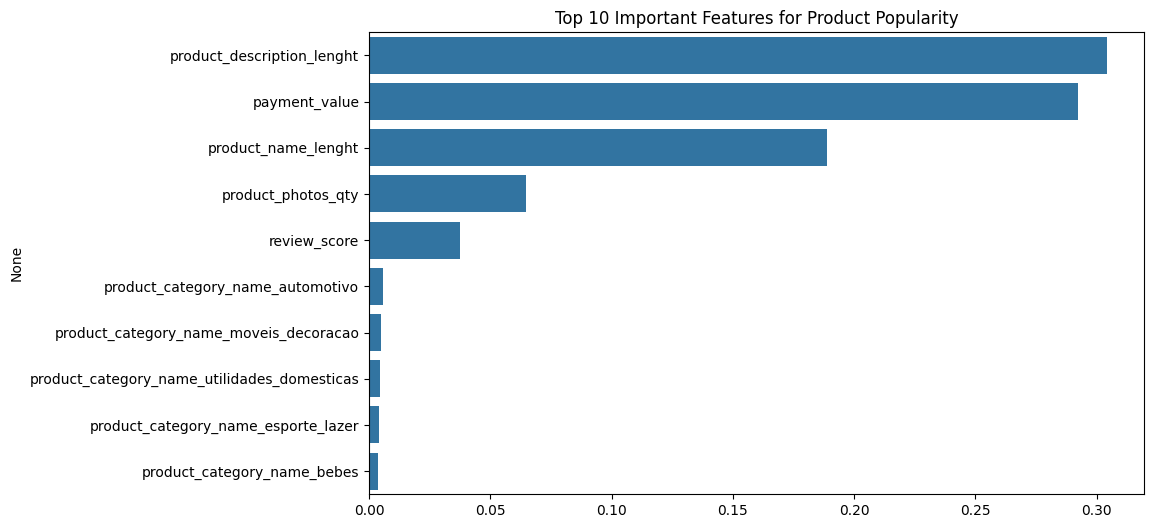

In [51]:
# Feature Importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Top 10 Important Features for Product Popularity")
plt.show()